In [827]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sweetviz as sv
from math import floor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

In [828]:
data = pd.read_csv('datasets/algerian_forest_dataset.csv', header= 0)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [829]:
data['regiao'] = 'NA'
for i in range(round(len(data)/2)):
    data.loc[i, 'regiao'] = 'NorthEast'

In [830]:
for i in range(123,244):
    data.loc[i, 'regiao'] = 'NorthWest'

In [831]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  regiao       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [832]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'regiao'],
      dtype='object')

In [833]:
data.loc[data['Classes  '].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,regiao
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,NorthWest


In [834]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [835]:
data['Temperature'] = pd.to_numeric(data['Temperature'])
data[' RH'] = pd.to_numeric(data[' RH'])
data[' Ws'] = pd.to_numeric(data[' Ws'])
data['Rain '] = pd.to_numeric(data['Rain '])
data['FFMC'] = pd.to_numeric(data['FFMC'])
data['DMC'] = pd.to_numeric(data['DMC'])
data['DC'] = pd.to_numeric(data['DC'])
data['ISI'] = pd.to_numeric(data['ISI'])
data['BUI'] = pd.to_numeric(data['BUI'])
data['FWI'] = pd.to_numeric(data['FWI'])

In [836]:
data['Classes  '].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [837]:
for i in range(len(data)):
    data.loc[i, 'Classes  '] = data.loc[i, 'Classes  '].replace(" ", "")

In [838]:
# Se ocorreu incêndio, fire, recebe 1, caso contrário recebe 0

data["Target"] = 'NA'
for i in range(len(data)):
    if(data.loc[i, 'Classes  ' ] == 'fire'):
        data.loc[i, 'Target'] = 1
    else:
        data.loc[i,'Target'] = 0

In [839]:
data = data.drop('Classes  ', axis = 1)

In [840]:
data['Target'].value_counts(normalize = True)

1    0.563786
0    0.436214
Name: Target, dtype: float64

In [841]:
df=data

In [842]:
rho = df.corr()
rho


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


In [676]:
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [843]:
df['day'] = pd.to_numeric(df['day'])
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_numeric(df['year'])

In [844]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


<BarContainer object of 243 artists>

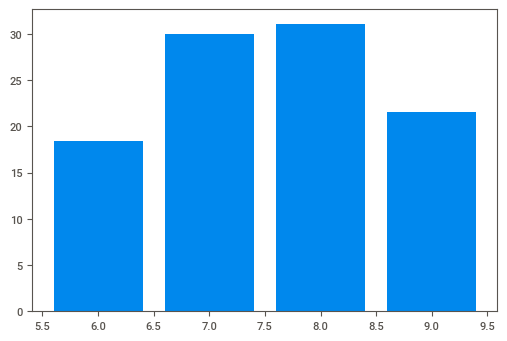

In [824]:
plt.bar(df['month'], df['FWI'])

In [845]:
df['Target'] = pd.to_numeric(df['Target'])

In [846]:
features = ['Temperature', ' RH', ' Ws', 'Rain ','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
target = 'Target'

In [847]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .33, random_state = 50)

In [848]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [849]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [868]:
np.array(y_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [869]:
print("Acurácia: " + str(accuracy_score(y_test,y_pred)))

print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Acurácia: 0.9506172839506173
F1 Score: 0.9555555555555557


In [871]:
print(confusion_matrix(y_test, y_pred))


[[34  1]
 [ 3 43]]


In [876]:
tp, fn, fp, tn  = confusion_matrix(y_test, y_pred).ravel()
print(tp)
print(fn)
print(fp)
print(tn)

34
1
3
43


In [877]:
34/37

0.918918918918919

In [862]:
clf.feature_importances_

array([0.00545255, 0.00706695, 0.00073934, 0.0382932 , 0.3158185 ,
       0.07862155, 0.05113105, 0.31625448, 0.04698737, 0.13963502])

In [864]:
feat_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feat_imp

ISI            0.316254
FFMC           0.315818
FWI            0.139635
DMC            0.078622
DC             0.051131
BUI            0.046987
Rain           0.038293
 RH            0.007067
Temperature    0.005453
 Ws            0.000739
dtype: float64

In [851]:
features2 = ['Temperature', ' RH','FFMC','DMC', 'DC', 'ISI', 'BUI']
target2 = 'FWI'

X2 = df[features2]
y2 = df[target2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= .33, random_state = 50)

reg = RandomForestRegressor(n_estimators = 200)
reg.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=200)

In [852]:
y_pred2 = reg.predict(X_test2)
y_pred2

array([1.45900e+00, 1.10000e-01, 1.63500e-01, 2.52250e+00, 2.57450e+00,
       1.18000e-01, 8.61000e-01, 3.90350e+00, 4.85000e-01, 5.05500e-01,
       3.60200e+00, 7.86500e-01, 1.83620e+01, 5.68000e-01, 9.84250e+00,
       2.23200e+01, 7.39000e-01, 2.19560e+01, 1.47395e+01, 1.67815e+01,
       7.52300e+00, 5.46500e-01, 7.66200e+00, 4.97950e+00, 1.03900e+00,
       3.80000e-02, 3.57000e-01, 1.67950e+00, 1.25500e-01, 8.49000e-01,
       6.26350e+00, 1.36595e+01, 4.09450e+00, 9.42950e+00, 7.21200e+00,
       8.19500e-01, 8.57500e-01, 1.73000e-01, 9.71500e+00, 6.11350e+00,
       6.36050e+00, 2.07830e+01, 2.28950e+00, 1.65170e+01, 4.16500e-01,
       1.72795e+01, 7.90450e+00, 2.28850e+00, 1.15065e+01, 6.29000e-01,
       1.34360e+01, 1.00475e+01, 1.10700e+00, 1.14500e-01, 2.41500e-01,
       1.80000e-01, 2.32500e-01, 7.51950e+00, 3.85000e-01, 1.80055e+01,
       1.39105e+01, 1.95875e+01, 5.19050e+00, 9.50300e+00, 6.01950e+00,
       1.72670e+01, 1.98340e+01, 6.67850e+00, 2.80200e+00, 8.460

In [853]:
print(mean_squared_error(y_test2,y_pred2))
print(mean_absolute_error(y_test2,y_pred2))

2.563197188271591
0.8019444444444425


In [854]:
print(reg.score(X_test2,y_test2))

0.9579962510085616


In [809]:
lm = LinearRegression()
lm.fit(X_train2,y_train2)

LinearRegression()

In [811]:
y_pred3 = lm.predict(X_test2)

In [812]:
print(mean_squared_error(y_test2,y_pred3))
print(mean_absolute_error(y_test2,y_pred3))

4.0591443617033836
0.7597710791351528


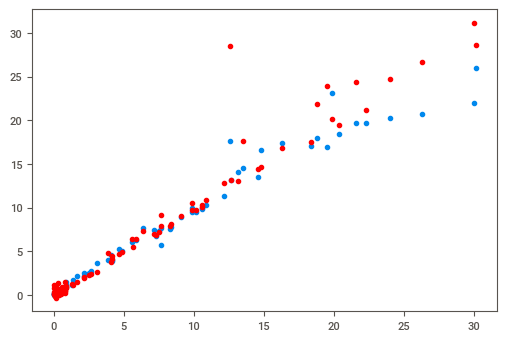

In [815]:
plt.scatter(y_test2, y_pred2)
plt.scatter(y_test2, y_pred3, c = 'red')
plt.scatter()